In [1]:
%pwd

'C:\\Users\\onder.tanrikulu'

In [2]:
%cd C:\Users\onder.tanrikulu\PycharmProjects\VBO-01

C:\Users\onder.tanrikulu\PycharmProjects\VBO-01


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from helpers.eda import *
from helpers.data_prep import *

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 500)

In [4]:
prevapp = pd.read_csv("datasets/project_datasets/previous_application.csv")

In [5]:
apptrain = pd.read_csv("datasets/project_datasets/application_train.csv")

In [6]:
check_df(prevapp)

##################### Shape #####################
(1670214, 37)
##################### Types #####################
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY         

In [ ]:
# Bulgular: Verisetinde 1670214 satır ve 37 sütun var.

In [8]:
duplicate = prevapp[prevapp.duplicated()]
duplicate

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


In [9]:
# Bulgular: Duplicate satır yok. SK_ID_PREV ve SK_ID_CURR değişkenlerinde duplicate var mı?
dup_id = prevapp["SK_ID_CURR"]

duplicate = dup_id[dup_id.duplicated()]
duplicate

23         302212
115        101529
180        405785
217        203250
262        163961
            ...  
1670209    352015
1670210    334635
1670211    249544
1670212    400317
1670213    261212
Name: SK_ID_CURR, Length: 1331357, dtype: int64

In [ ]:
# Bulgular: 1331357 SK_ID_CURR duplicate. 
# Bulgular: Bu normal çünkü application verisetindeki bir başvuru birçok geçmiş başvuruya sahip olabilir.

In [10]:
dup_id = prevapp["SK_ID_PREV"]

duplicate = dup_id[dup_id.duplicated()]
duplicate

Series([], Name: SK_ID_PREV, dtype: int64)

In [ ]:
# Bulgular: Duplicate geçmiş başvuru "SK_ID_PREV" ID'si yok.

In [11]:
missing_values_table(prevapp)

                            n_miss  ratio
RATE_INTEREST_PRIMARY      1664263 99.640
RATE_INTEREST_PRIVILEGED   1664263 99.640
AMT_DOWN_PAYMENT            895844 53.640
RATE_DOWN_PAYMENT           895844 53.640
NAME_TYPE_SUITE             820405 49.120
DAYS_FIRST_DRAWING          673065 40.300
DAYS_FIRST_DUE              673065 40.300
DAYS_LAST_DUE_1ST_VERSION   673065 40.300
DAYS_LAST_DUE               673065 40.300
DAYS_TERMINATION            673065 40.300
NFLAG_INSURED_ON_APPROVAL   673065 40.300
AMT_GOODS_PRICE             385515 23.080
AMT_ANNUITY                 372235 22.290
CNT_PAYMENT                 372230 22.290
PRODUCT_COMBINATION            346  0.020
AMT_CREDIT                       1  0.000


In [12]:
def missing_df(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    return missing_df

missdf  = missing_df(prevapp)
missdf = missdf.reset_index()
manyna_cols = []

In [13]:
for index, row in missdf.iterrows():
    if row["ratio"] > 40:
        manyna_cols.append(row["index"])
        
prevapp[manyna_cols]

# Bulgular: %40'tan fazla missing value'su olan 11 tane değişken var.

,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,NAME_TYPE_SUITE,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0.183,0.867,0.000,0.000,NaN,365243.000,-42.000,300.000,-42.000,-37.000,0.000
1,NaN,NaN,NaN,NaN,Unaccompanied,365243.000,-134.000,916.000,365243.000,365243.000,1.000
2,NaN,NaN,NaN,NaN,"Spouse, partner",365243.000,-271.000,59.000,365243.000,365243.000,1.000
3,NaN,NaN,NaN,NaN,NaN,365243.000,-482.000,-152.000,-182.000,-177.000,1.000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1670209,NaN,NaN,0.000,0.000,NaN,365243.000,-508.000,362.000,-358.000,-351.000,0.000
1670210,NaN,NaN,29250.000,0.341,Unaccompanied,365243.000,-1604.000,-1274.000,-1304.000,-1297.000,0.000
1670211,NaN,NaN,10525.500,0.101,"Spouse, partner",365243.000,-1457.000,-1187.000,-1187.000,-1181.000,0.000
1670212,NaN,NaN,NaN,NaN,Family,365243.000,-1155.000,-825.000,-825.000,-817.000,1.000


In [15]:
cat_cols, num_cols, cat_but_car = grab_col_names(prevapp)

Observations: 1670214
Variables: 37
cat_cols: 16
num_cols: 19
cat_but_car: 2
num_but_cat: 2


                 NAME_CONTRACT_TYPE  Ratio
Cash loans                   747553 44.758
Consumer loans               729151 43.656
Revolving loans              193164 11.565
XNA                             346  0.021
##########################################


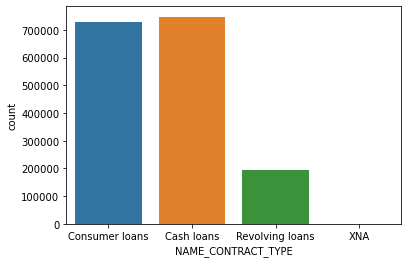

           WEEKDAY_APPR_PROCESS_START  Ratio
TUESDAY                        255118 15.275
WEDNESDAY                      255010 15.268
MONDAY                         253557 15.181
FRIDAY                         252048 15.091
THURSDAY                       249099 14.914
SATURDAY                       240631 14.407
SUNDAY                         164751  9.864
##########################################


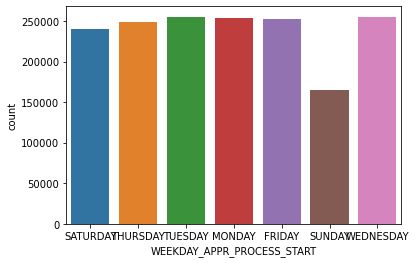

   FLAG_LAST_APPL_PER_CONTRACT  Ratio
Y                      1661739 99.493
N                         8475  0.507
##########################################


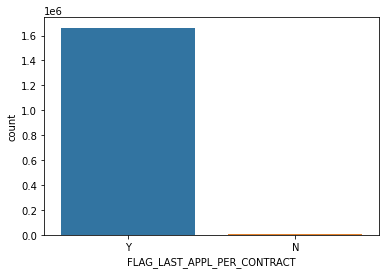

              NAME_CONTRACT_STATUS  Ratio
Approved                   1036781 62.075
Canceled                    316319 18.939
Refused                     290678 17.404
Unused offer                 26436  1.583
##########################################


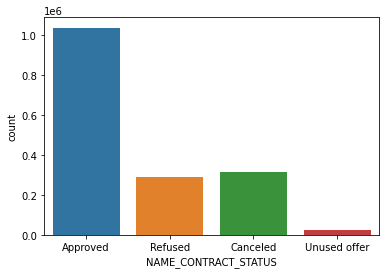

                                           NAME_PAYMENT_TYPE  Ratio
Cash through the bank                                1033552 61.881
XNA                                                   627384 37.563
Non-cash from your account                              8193  0.491
Cashless from the account of the employer               1085  0.065
##########################################


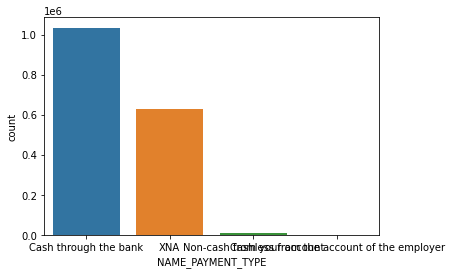

        CODE_REJECT_REASON  Ratio
XAP                1353093 81.013
HC                  175231 10.492
LIMIT                55680  3.334
SCO                  37467  2.243
CLIENT               26436  1.583
SCOFR                12811  0.767
XNA                   5244  0.314
VERIF                 3535  0.212
SYSTEM                 717  0.043
##########################################


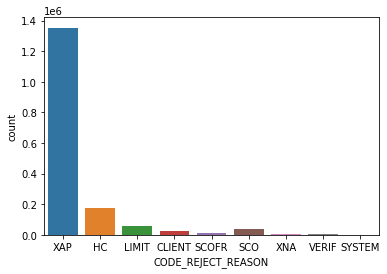

                 NAME_TYPE_SUITE  Ratio
Unaccompanied             508970 30.473
Family                    213263 12.769
Spouse, partner            67069  4.016
Children                   31566  1.890
Other_B                    17624  1.055
Other_A                     9077  0.543
Group of people             2240  0.134
##########################################


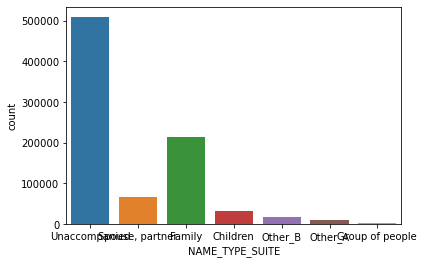

           NAME_CLIENT_TYPE  Ratio
Repeater            1231261 73.719
New                  301363 18.043
Refreshed            135649  8.122
XNA                    1941  0.116
##########################################


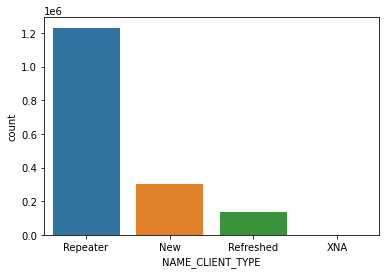

       NAME_PORTFOLIO  Ratio
POS            691011 41.373
Cash           461563 27.635
XNA            372230 22.286
Cards          144985  8.681
Cars              425  0.025
##########################################


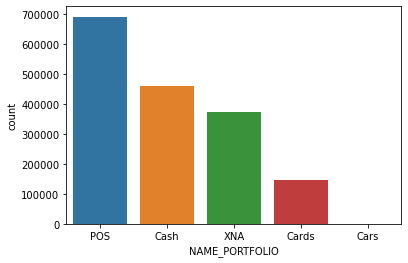

         NAME_PRODUCT_TYPE  Ratio
XNA                1063666 63.684
x-sell              456287 27.319
walk-in             150261  8.997
##########################################


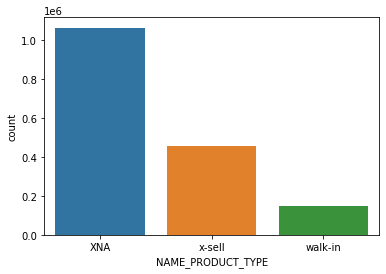

                            CHANNEL_TYPE  Ratio
Credit and cash offices           719968 43.106
Country-wide                      494690 29.618
Stone                             212083 12.698
Regional / Local                  108528  6.498
Contact center                     71297  4.269
AP+ (Cash loan)                    57046  3.415
Channel of corporate sales          6150  0.368
Car dealer                           452  0.027
##########################################


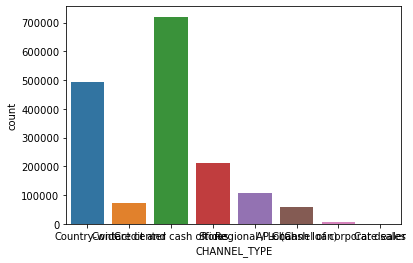

                      NAME_SELLER_INDUSTRY  Ratio
XNA                                 855720 51.234
Consumer electronics                398265 23.845
Connectivity                        276029 16.527
Furniture                            57849  3.464
Construction                         29781  1.783
Clothing                             23949  1.434
Industry                             19194  1.149
Auto technology                       4990  0.299
Jewelry                               2709  0.162
MLM partners                          1215  0.073
Tourism                                513  0.031
##########################################


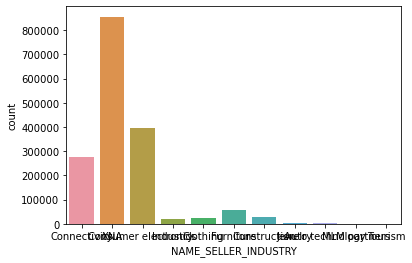

            NAME_YIELD_GROUP  Ratio
XNA                   517215 30.967
middle                385532 23.083
high                  353331 21.155
low_normal            322095 19.285
low_action             92041  5.511
##########################################


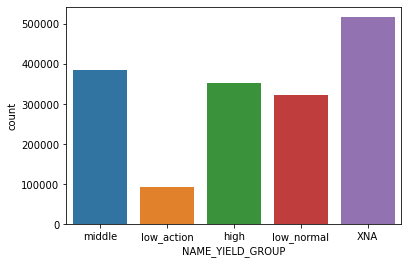

                                PRODUCT_COMBINATION  Ratio
Cash                                         285990 17.123
POS household with interest                  263622 15.784
POS mobile with interest                     220670 13.212
Cash X-Sell: middle                          143883  8.615
Cash X-Sell: low                             130248  7.798
Card Street                                  112582  6.741
POS industry with interest                    98833  5.917
POS household without interest                82908  4.964
Card X-Sell                                   80582  4.825
Cash Street: high                             59639  3.571
Cash X-Sell: high                             59301  3.551
Cash Street: middle                           34658  2.075
Cash Street: low                              33834  2.026
POS mobile without interest                   24082  1.442
POS other with interest                       23879  1.430
POS industry without interest                 12602  0.7

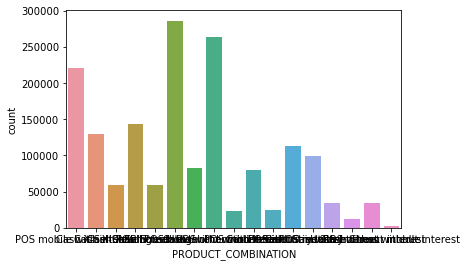

   NFLAG_LAST_APPL_IN_DAY  Ratio
1                 1664314 99.647
0                    5900  0.353
##########################################


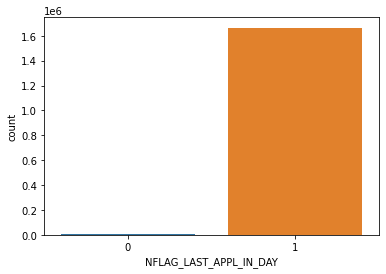

       NFLAG_INSURED_ON_APPROVAL  Ratio
0.000                     665527 39.847
1.000                     331622 19.855
##########################################


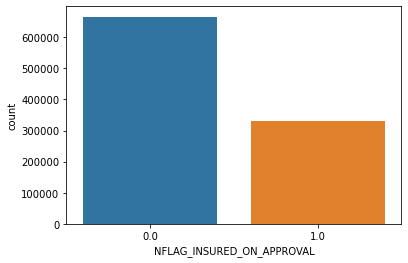

In [16]:
for col in cat_cols:
    cat_summary(prevapp, col, True)

                                  NAME_CASH_LOAN_PURPOSE  Ratio
XAP                                               922661 55.242
XNA                                               677918 40.589
Repairs                                            23765  1.423
Other                                              15608  0.934
Urgent needs                                        8412  0.504
Buying a used car                                   2888  0.173
Building a house or an annex                        2693  0.161
Everyday expenses                                   2416  0.145
Medicine                                            2174  0.130
Payments on other loans                             1931  0.116
Education                                           1573  0.094
Journey                                             1239  0.074
Purchase of electronic equipment                    1061  0.064
Buying a new car                                    1012  0.061
Wedding / gift / holiday                

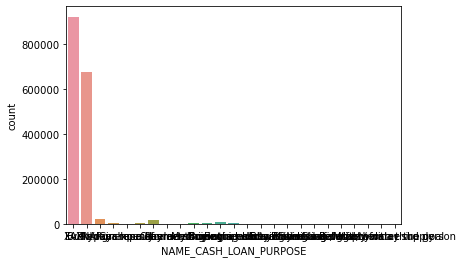

                          NAME_GOODS_CATEGORY  Ratio
XNA                                    950809 56.927
Mobile                                 224708 13.454
Consumer Electronics                   121576  7.279
Computers                              105769  6.333
Audio/Video                             99441  5.954
Furniture                               53656  3.213
Photo / Cinema Equipment                25021  1.498
Construction Materials                  24995  1.497
Clothing and Accessories                23554  1.410
Auto Accessories                         7381  0.442
Jewelry                                  6290  0.377
Homewares                                5023  0.301
Medical Supplies                         3843  0.230
Vehicles                                 3370  0.202
Sport and Leisure                        2981  0.178
Gardening                                2668  0.160
Other                                    2554  0.153
Office Appliances                        2333 

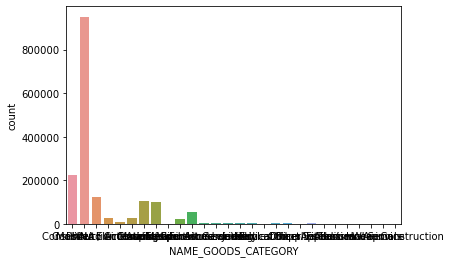

In [17]:
for col in cat_but_car:
    cat_summary(prevapp, col, True)

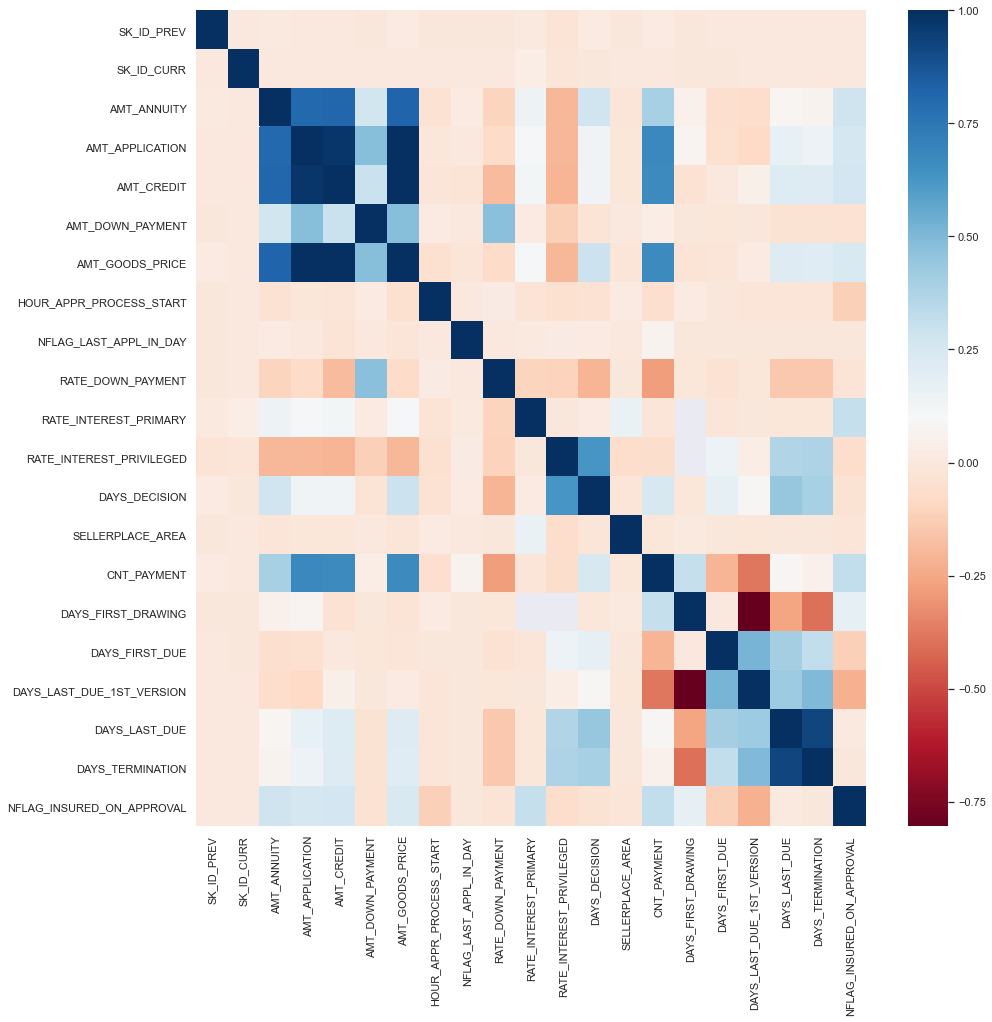

['AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_TERMINATION']

In [18]:
high_correlated_cols(prevapp, plot=True, corr_th=0.90)

count   1670214.000
mean    1923089.135
std      532597.959
min     1000001.000
5%      1092565.300
10%     1185033.300
20%     1369638.600
30%     1554162.900
40%     1738683.200
50%     1923110.500
60%     2107814.800
70%     2292142.100
80%     2476534.400
90%     2660864.700
95%     2753178.350
99%     2826906.870
max     2845382.000
Name: SK_ID_PREV, dtype: float64


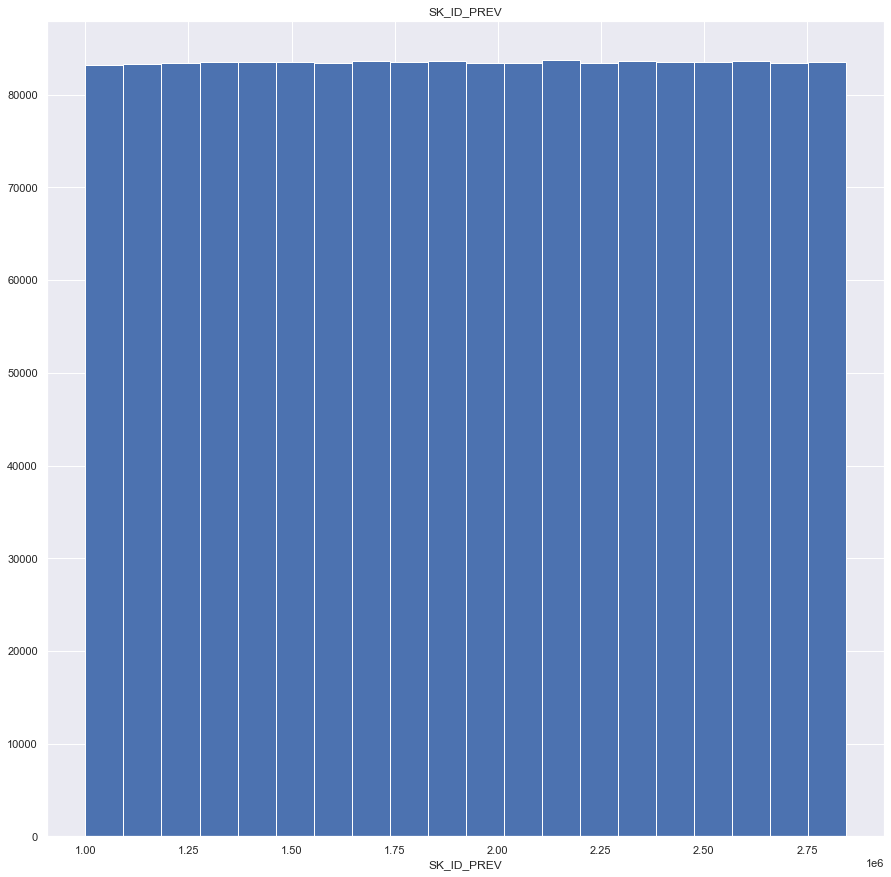

count   1670214.000
mean     278357.174
std      102814.824
min      100001.000
5%       117930.000
10%      135738.000
20%      171625.000
30%      207044.900
40%      242727.000
50%      278714.500
60%      314099.000
70%      349642.000
80%      384570.000
90%      421359.000
95%      438443.000
99%      452785.000
max      456255.000
Name: SK_ID_CURR, dtype: float64


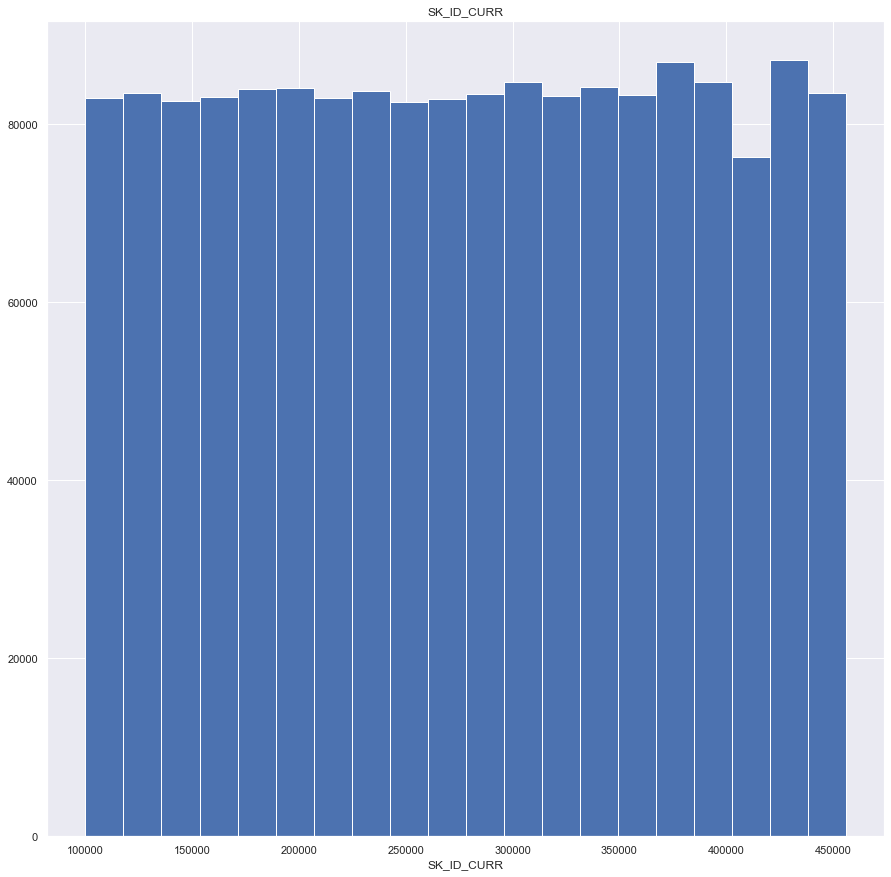

count   1297979.000
mean      15955.121
std       14782.137
min           0.000
5%         2726.595
10%        3817.530
20%        5463.765
30%        7106.445
40%        9000.000
50%       11250.000
60%       13844.241
70%       17783.127
80%       23638.500
90%       34703.820
95%       45336.780
99%       69685.789
max      418058.145
Name: AMT_ANNUITY, dtype: float64


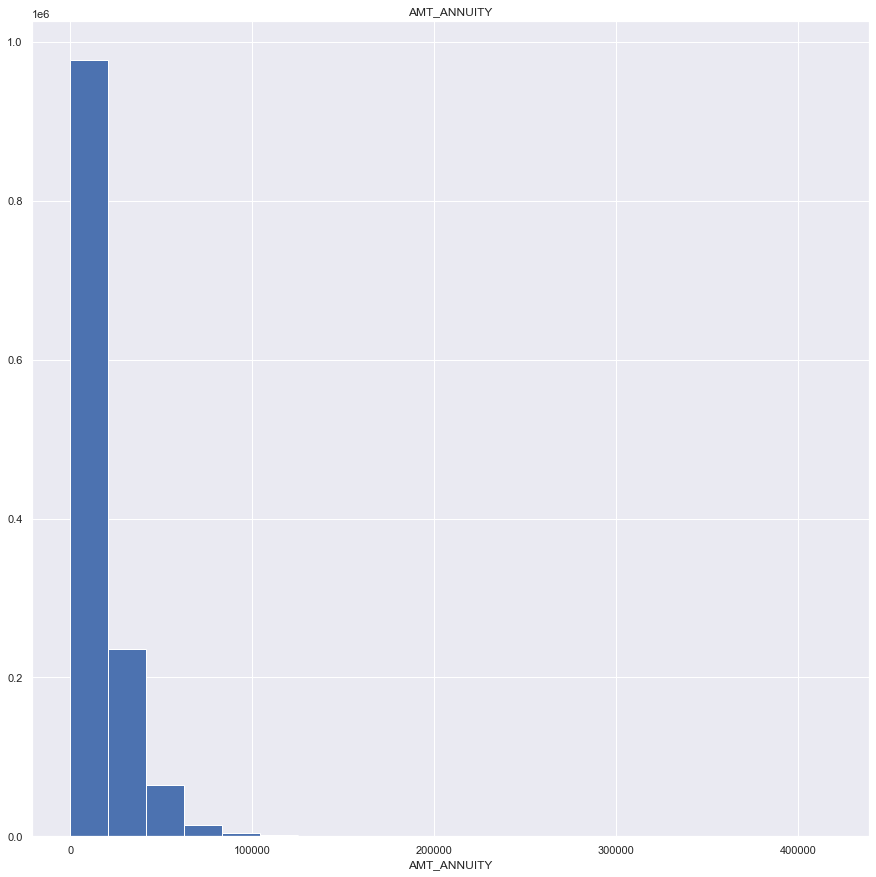

count   1670214.000
mean     175233.860
std      292779.762
min           0.000
5%            0.000
10%           0.000
20%           0.000
30%       29151.000
40%       45000.000
50%       71046.000
60%      103770.000
70%      144769.500
80%      228937.500
90%      450000.000
95%      787500.000
99%     1350000.000
max     6905160.000
Name: AMT_APPLICATION, dtype: float64


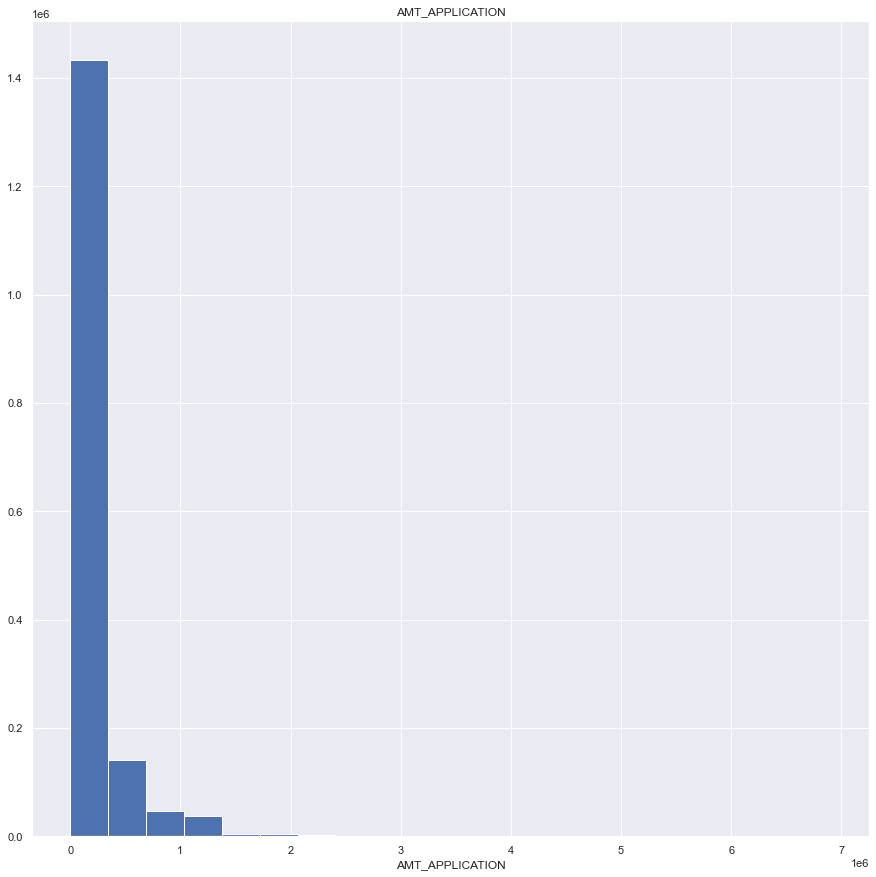

count   1670213.000
mean     196114.021
std      318574.617
min           0.000
5%            0.000
10%           0.000
20%           0.000
30%       33768.000
40%       51916.500
50%       80541.000
60%      116032.500
70%      167895.000
80%      270000.000
90%      533160.000
95%      886500.000
99%     1515377.700
max     6905160.000
Name: AMT_CREDIT, dtype: float64


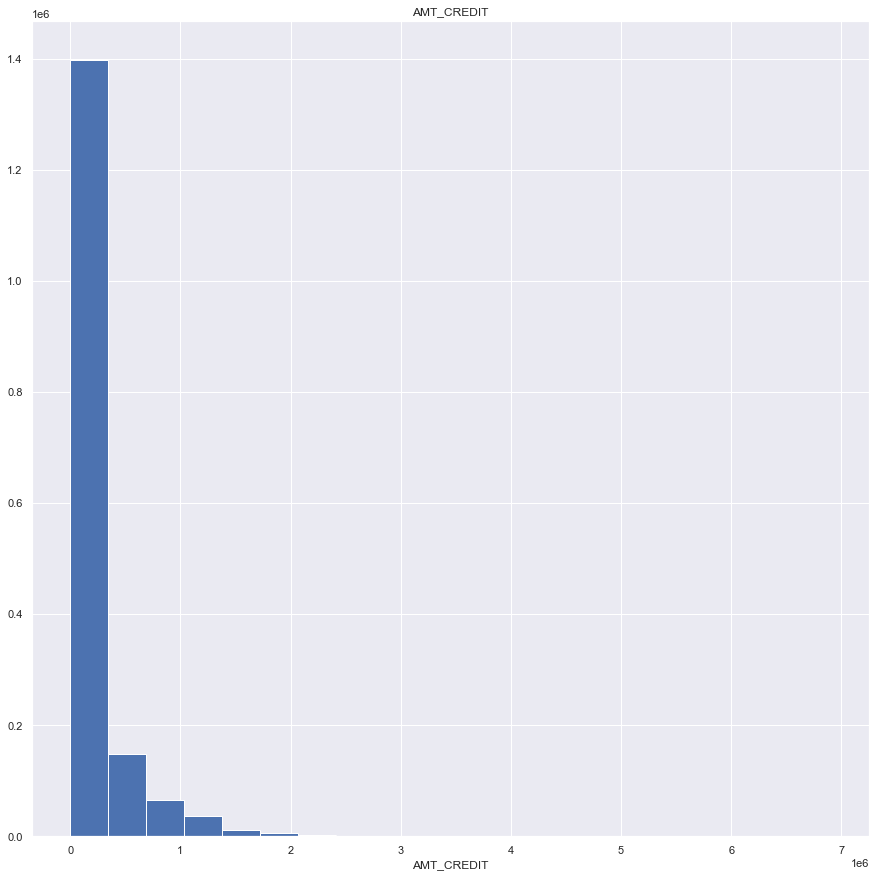

count    774370.000
mean       6697.402
std       20921.495
min          -0.900
5%            0.000
10%           0.000
20%           0.000
30%           0.000
40%           0.000
50%        1638.000
60%        3793.500
70%        6057.000
80%        9450.000
90%       17109.000
95%       26184.082
99%       65930.895
max     3060045.000
Name: AMT_DOWN_PAYMENT, dtype: float64


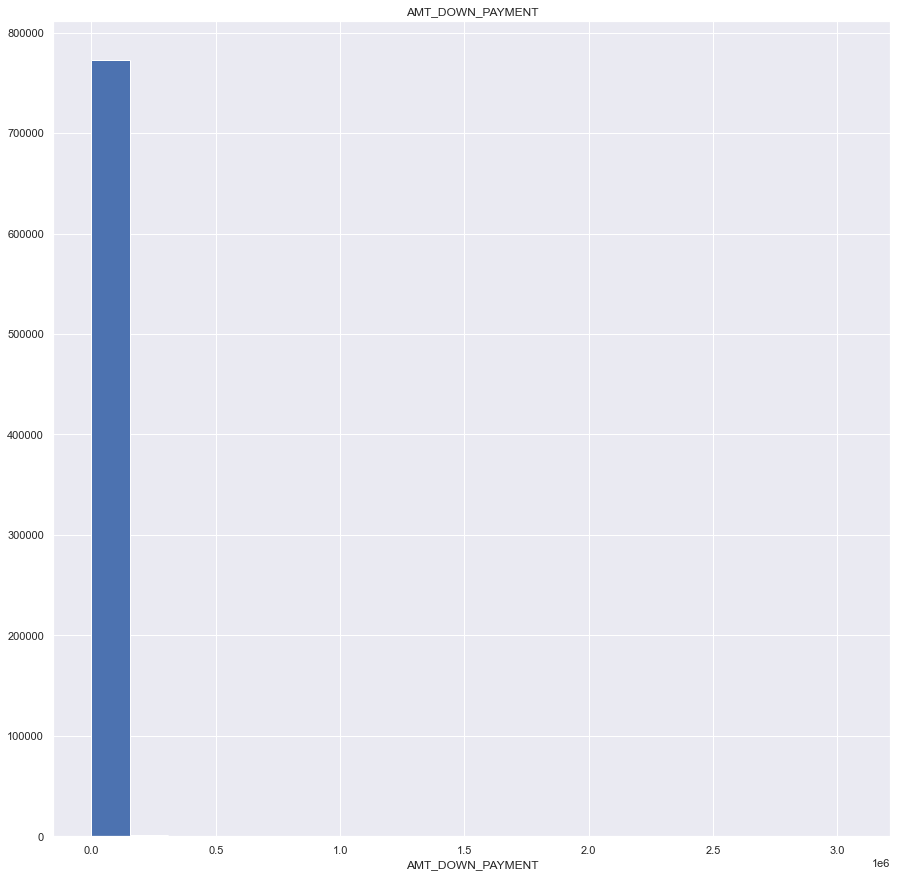

count   1284699.000
mean     227847.279
std      315396.558
min           0.000
5%        22882.500
10%       30555.000
20%       45000.000
30%       62059.500
40%       85045.950
50%      112320.000
60%      139050.000
70%      211500.000
80%      315000.000
90%      585000.000
95%      900000.000
99%     1395000.000
max     6905160.000
Name: AMT_GOODS_PRICE, dtype: float64


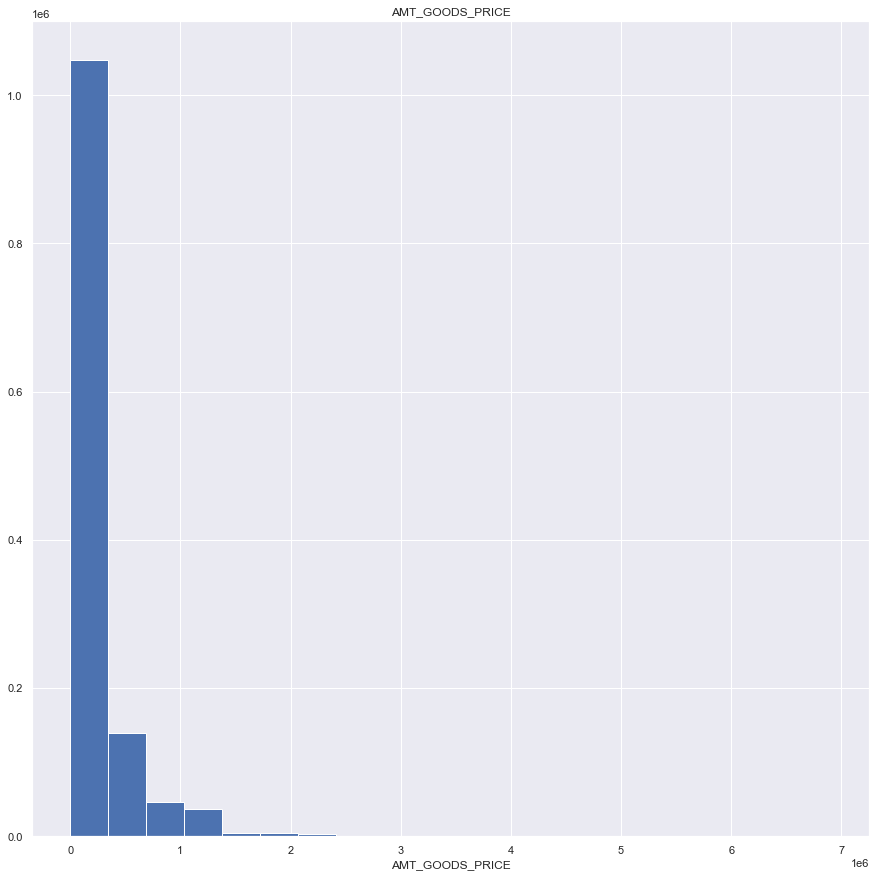

count   1670214.000
mean         12.484
std           3.334
min           0.000
5%            7.000
10%           8.000
20%          10.000
30%          11.000
40%          11.000
50%          12.000
60%          13.000
70%          14.000
80%          16.000
90%          17.000
95%          18.000
99%          20.000
max          23.000
Name: HOUR_APPR_PROCESS_START, dtype: float64


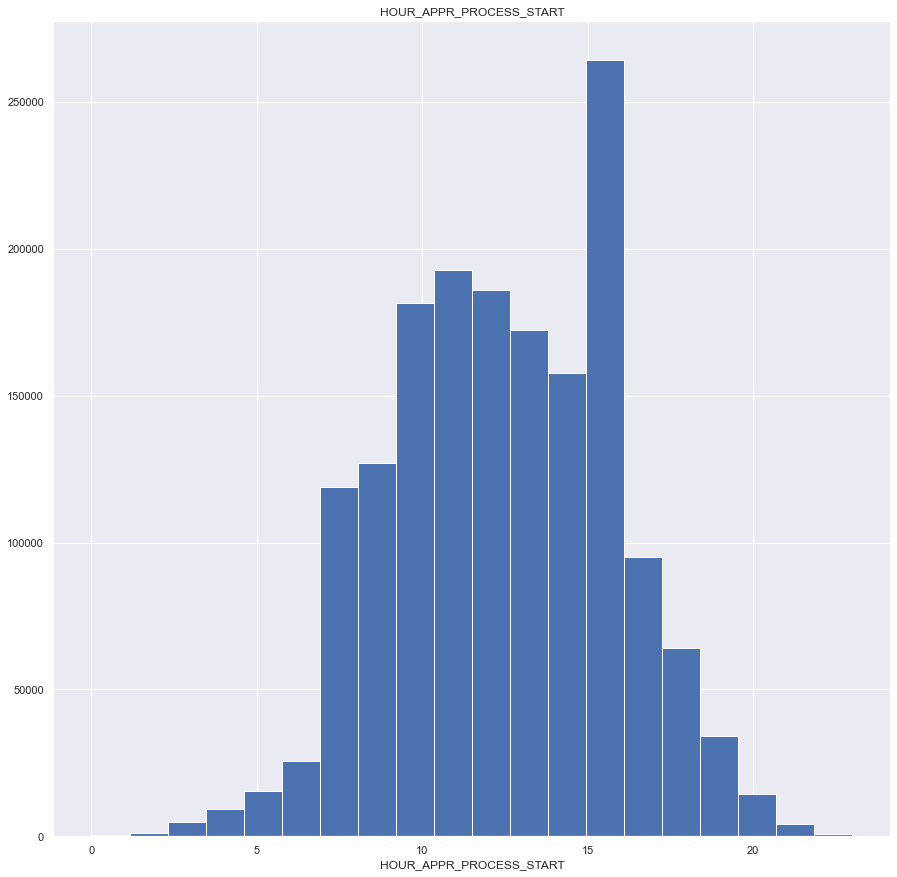

count   774370.000
mean         0.080
std          0.108
min         -0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.052
60%          0.101
70%          0.108
80%          0.110
90%          0.212
95%          0.294
99%          0.521
max          1.000
Name: RATE_DOWN_PAYMENT, dtype: float64


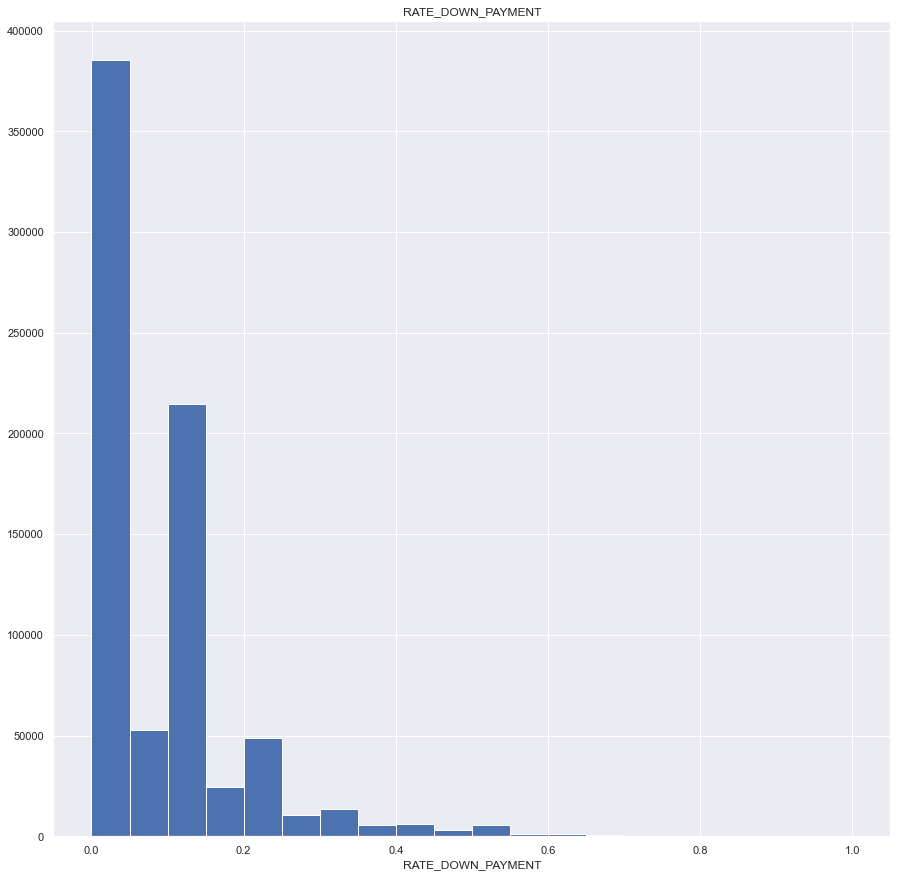

count   5951.000
mean       0.188
std        0.088
min        0.035
5%         0.142
10%        0.142
20%        0.161
30%        0.161
40%        0.176
50%        0.189
60%        0.189
70%        0.189
80%        0.193
90%        0.197
95%        0.197
99%        0.696
max        1.000
Name: RATE_INTEREST_PRIMARY, dtype: float64


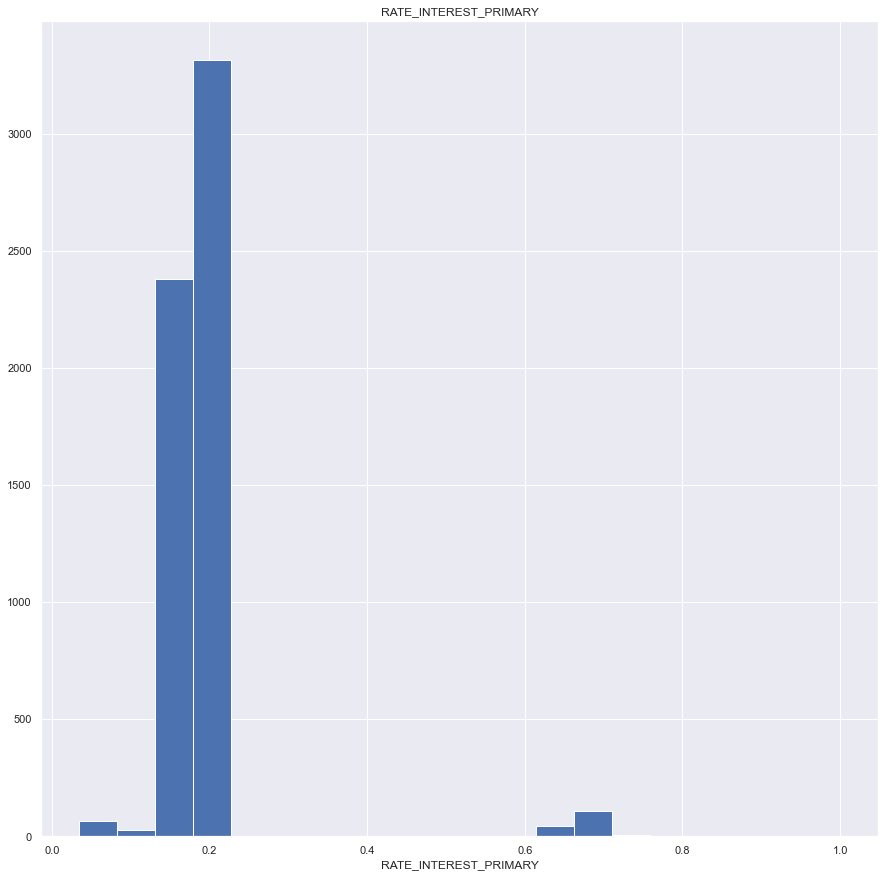

count   5951.000
mean       0.774
std        0.101
min        0.373
5%         0.638
10%        0.638
20%        0.638
30%        0.716
40%        0.832
50%        0.835
60%        0.835
70%        0.853
80%        0.853
90%        0.867
95%        0.867
99%        0.867
max        1.000
Name: RATE_INTEREST_PRIVILEGED, dtype: float64


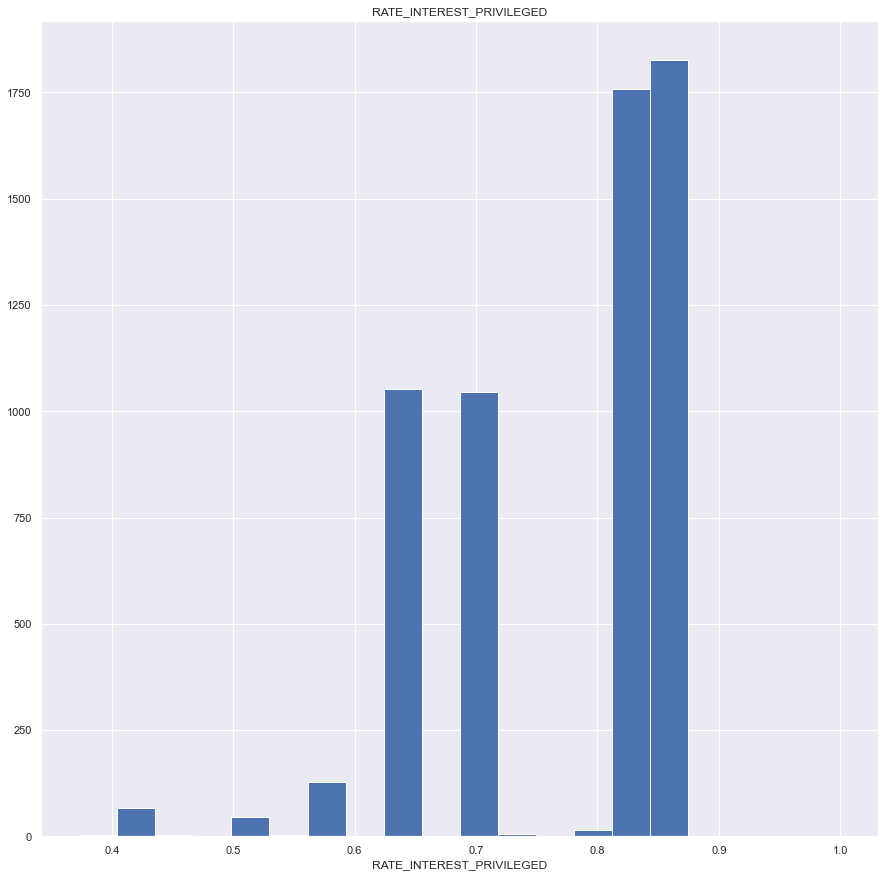

count   1670214.000
mean       -880.680
std         779.100
min       -2922.000
5%        -2559.000
10%       -2250.000
20%       -1555.000
30%       -1087.000
40%        -789.000
50%        -581.000
60%        -430.000
70%        -325.000
80%        -239.000
90%        -152.000
95%         -85.000
99%         -14.000
max          -1.000
Name: DAYS_DECISION, dtype: float64


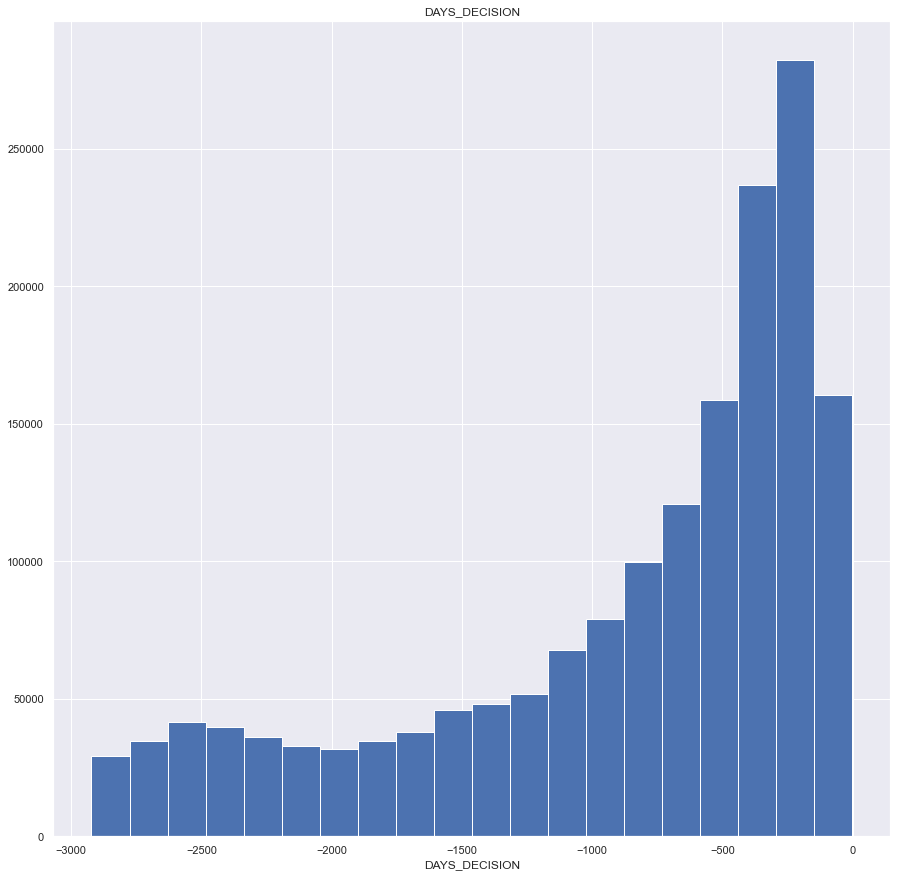

count   1670214.000
mean        313.951
std        7127.443
min          -1.000
5%           -1.000
10%          -1.000
20%          -1.000
30%          -1.000
40%          -1.000
50%           3.000
60%          27.000
70%          50.000
80%         140.000
90%         919.000
95%        1820.000
99%        3570.000
max     4000000.000
Name: SELLERPLACE_AREA, dtype: float64


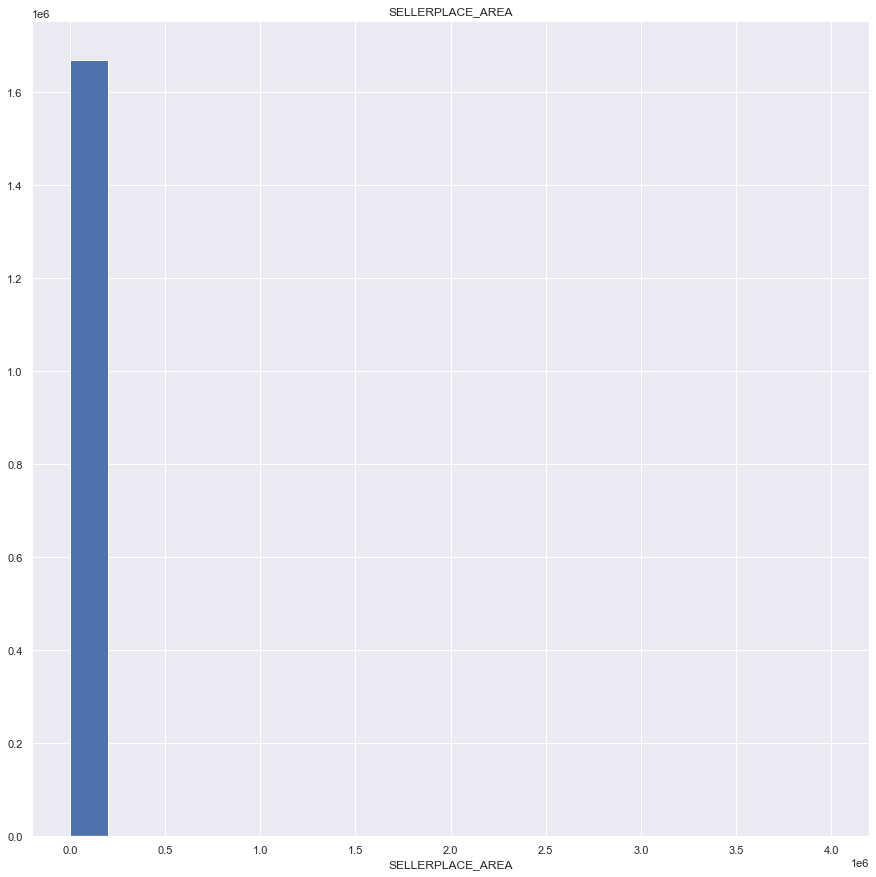

count   1297984.000
mean         16.054
std          14.567
min           0.000
5%            0.000
10%           0.000
20%           6.000
30%           8.000
40%          10.000
50%          12.000
60%          12.000
70%          18.000
80%          24.000
90%          36.000
95%          48.000
99%          60.000
max          84.000
Name: CNT_PAYMENT, dtype: float64


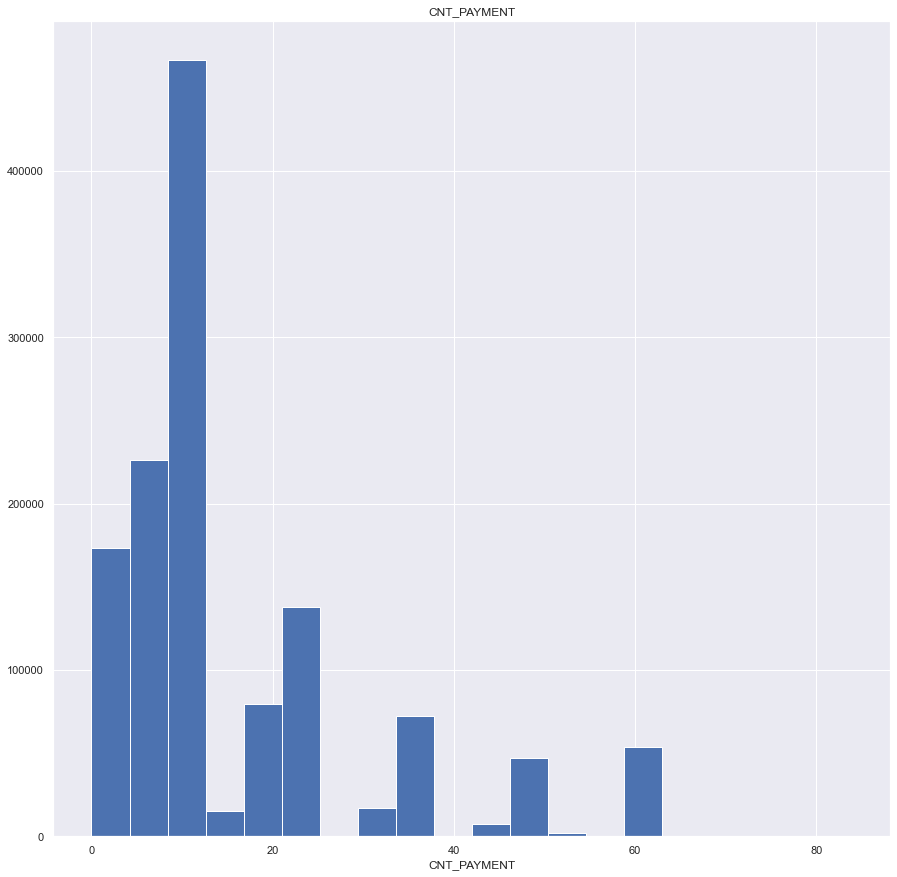

count   997149.000
mean    342209.855
std      88916.116
min      -2922.000
5%        -269.000
10%     365243.000
20%     365243.000
30%     365243.000
40%     365243.000
50%     365243.000
60%     365243.000
70%     365243.000
80%     365243.000
90%     365243.000
95%     365243.000
99%     365243.000
max     365243.000
Name: DAYS_FIRST_DRAWING, dtype: float64


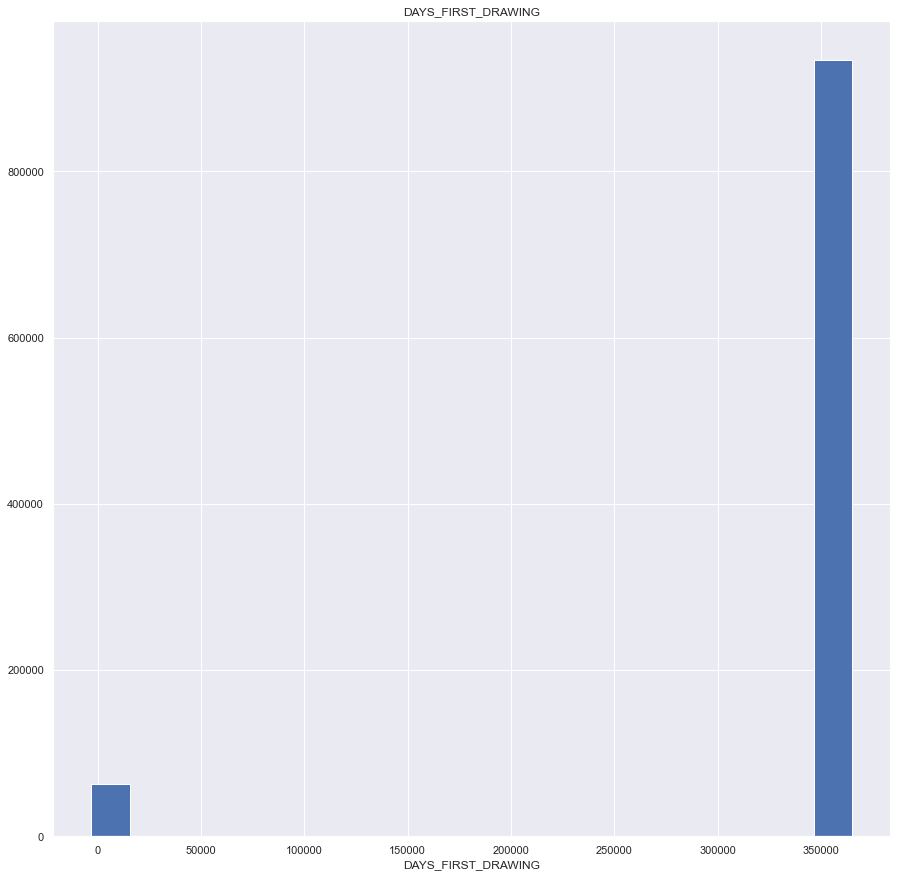

count   997149.000
mean     13826.269
std      72444.870
min      -2892.000
5%       -2608.000
10%      -2392.000
20%      -1875.000
30%      -1425.000
40%      -1068.000
50%       -831.000
60%       -653.000
70%       -490.000
80%       -332.000
90%       -173.000
95%        -48.000
99%     365243.000
max     365243.000
Name: DAYS_FIRST_DUE, dtype: float64


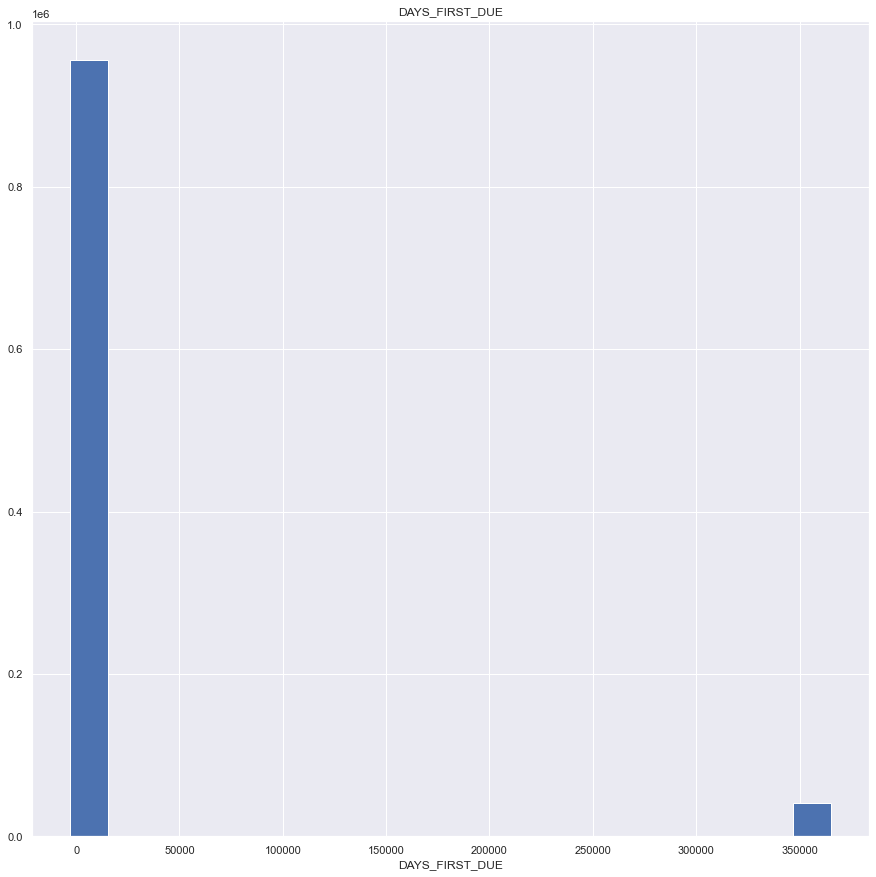

count   997149.000
mean     33767.774
std     106857.035
min      -2801.000
5%       -2327.000
10%      -2047.000
20%      -1495.000
30%      -1015.000
40%       -641.000
50%       -361.000
60%       -150.000
70%         31.000
80%        267.000
90%       1432.000
95%     365243.000
99%     365243.000
max     365243.000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


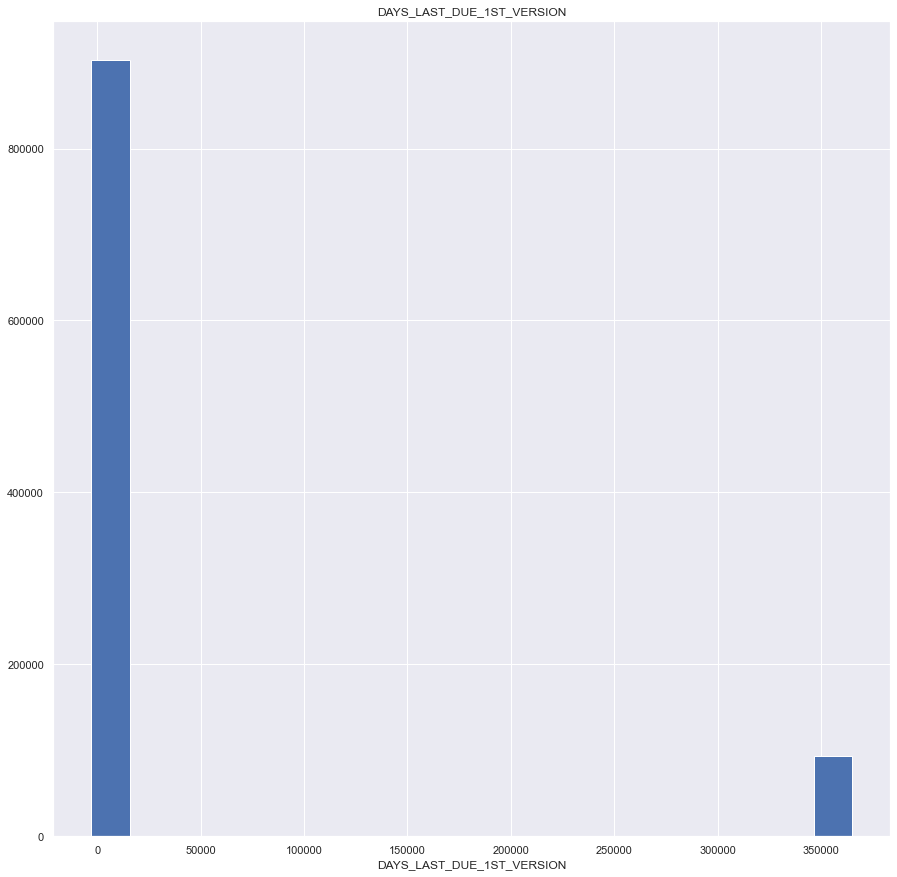

count   997149.000
mean     76582.403
std     149647.415
min      -2889.000
5%       -2349.000
10%      -2081.000
20%      -1552.000
30%      -1109.000
40%       -785.000
50%       -537.000
60%       -337.000
70%       -165.000
80%     365243.000
90%     365243.000
95%     365243.000
99%     365243.000
max     365243.000
Name: DAYS_LAST_DUE, dtype: float64


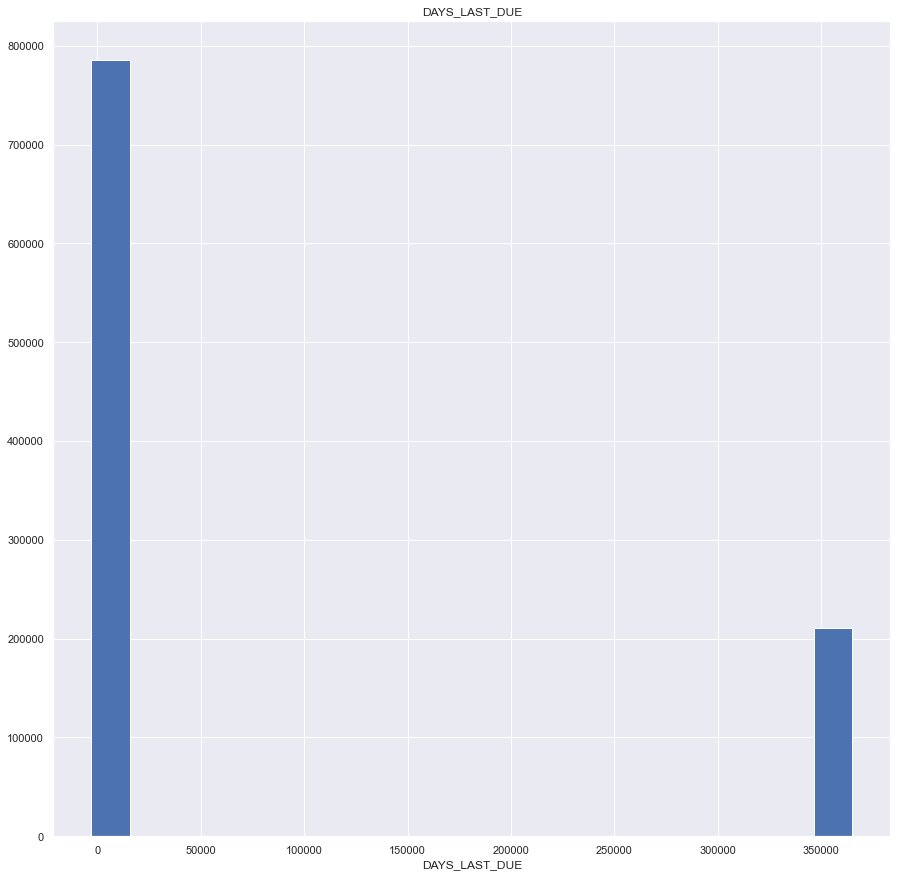

count   997149.000
mean     81992.344
std     153303.517
min      -2874.000
5%       -2331.000
10%      -2052.000
20%      -1507.000
30%      -1066.000
40%       -744.000
50%       -499.000
60%       -303.000
70%       -134.000
80%     365243.000
90%     365243.000
95%     365243.000
99%     365243.000
max     365243.000
Name: DAYS_TERMINATION, dtype: float64


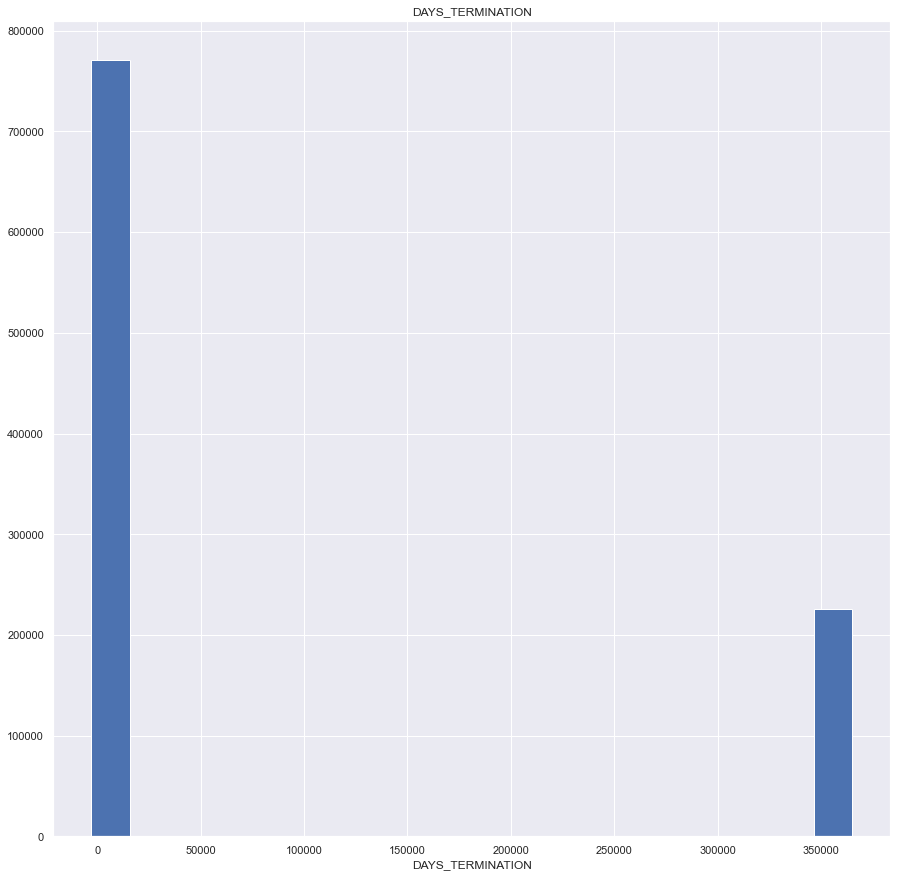

In [19]:
# Numeric kolonlarin analizi
#############################################

for col in num_cols:
    num_summary(prevapp, col, True)

In [20]:
# Hangi numerik değişkenlerde outlier var
for col in num_cols:
    print(col + ": ", check_outlier(prevapp, col))

SK_ID_PREV:  False
SK_ID_CURR:  False
AMT_ANNUITY:  True
AMT_APPLICATION:  True
AMT_CREDIT:  True
AMT_DOWN_PAYMENT:  True
AMT_GOODS_PRICE:  True
HOUR_APPR_PROCESS_START:  False
RATE_DOWN_PAYMENT:  True
RATE_INTEREST_PRIMARY:  True
RATE_INTEREST_PRIVILEGED:  False
DAYS_DECISION:  False
SELLERPLACE_AREA:  True
CNT_PAYMENT:  False
DAYS_FIRST_DRAWING:  False
DAYS_FIRST_DUE:  True
DAYS_LAST_DUE_1ST_VERSION:  False
DAYS_LAST_DUE:  False
DAYS_TERMINATION:  False
